In [ ]:
import gc
gc.collect()

In [1]:
import numpy as np
import skimage.measure
# import pydicom
import os
import matplotlib.pyplot as plt
import cv2
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.data import Dataset
from tensorflow.examples.tensorflow_examples.models.pix2pix import pix2pix
from IPython.display import clear_output
import matplotlib.pyplot as plt
from keras import backend as K
import keras

In [2]:
# plt.gray()
os.chdir('C:/Users/span/Documents/CNN/')

In [3]:
# load for countinue trainning
model = tf.keras.models.load_model('03_model/Model_tensflow.ep20_23.32.h5')

In [4]:
number3 = 33
subfolder3 = str(number3) + "_prepro"

path5 = "01_perprocess/"+str(number3)+"/"+subfolder3

In [5]:
def read_image1(img_path: str) -> dict:
    image = tf.io.read_file(img_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.uint8)
    return {'image': image}

In [7]:
# from run
SEED = 1024

batch_size = 16
target_size=(256, 256)

dataset0 = tf.data.Dataset.list_files(path5+"/*.png", seed=SEED)
dataset0 = dataset0.map(read_image1)

In [8]:
@tf.function
def normalize(input_image: tf.Tensor) -> tuple:
    input_image = tf.cast(input_image, tf.float32) / 255.0
    return input_image

@tf.function
def load_image_pre(datapoint: dict) -> tuple:
    input_image = tf.image.resize(datapoint['image'], (IMG_SIZE, IMG_SIZE))
    
    input_image = normalize(input_image)

    return input_image

In [10]:
IMG_SIZE = 256

dataset = {"image": dataset0}

predict = dataset['image'].map(load_image_pre, num_parallel_calls=tf.data.experimental.AUTOTUNE)
predict = predict.cache().batch(batch_size)
predict = predict.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)  


In [11]:
predictions = model.predict(predict, steps=len(os.listdir(path5)) // batch_size)

In [12]:
predictions.shape

(544, 256, 256, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


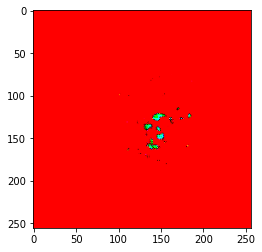

In [21]:
plt.imshow(predictions[251,:,:])

In [14]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()

In [ ]:
display(predictions[251,:,:])

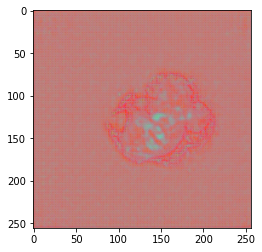

In [22]:
plt.imshow(tf.keras.preprocessing.image.array_to_img(predictions[251,:,:,:]))

In [ ]:
# test
def preprocess_image(file):
    # file is not a tensor, so we have to use functions that work on tensors
    img_string = tf.read_file(file)
    img = tf.image.decode_png(img_string)
    img = tf.image.resize_images(target_size)
    img = vgg16.preprocess_input(img)  # this function can handle tensors as well.
    return img


batch_size = 16
num_threads = 2
target_size=(256, 256)

files = [file1, file2, ...]
dataset = Dataset.from_tensor_slices(tf.constant(files))
dataset = dataset.map(preprocess_image, num_threads)
dataset = dataset.batch(batch_size)
dataset = dataset.prefetch(1)  
predictions = vgg_model.predict(dataset, steps=len(files) // batch_size)
# You could decode the predictions from here :)